<center><img src="img/Marca-ITBA-Color-ALTA.png" width="250">

<h1>Master en Management & Analytics</h1>
</center>


## Clase 6 - Regresión Logística

#### Referencias y bibliografía de consulta:

- Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido (O’Reilly) 2017 
- An Introduction to Statistical Learning with Applications in R by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani (Springer) 2017 
- Python Machine Learning - Second Edition by Sebastian Raschka (Packt) 2017 
- https://scikit-learn.org/

## Regresión Logística


<img src="img/log_reg.png" width="800">
<div class='epigraph' align="center"><i>Regresión Lineal</i></div><br>


La regresión logística es un modelo lineal de regresión. Consiste en aplicar la función *sigmoidea* a la combinación lineal de las features. Esta función compacta el output del modelo entre $0$ y $1$ y por lo tanto la podemos usar para predecir una probabilidad. 

La predicción del modelo será entonces una probabilidad, la probabilidad de que se verifique el evento de la clase 1, dados los valores de las *features*: $P(y=1|x=X)$. 

###### La función sigmoidea
$$
\sigma(z) = \frac{e^{z}}{1+e^{z}} = \frac{1}{1+e^{-z}}
$$



Importemos las librerías y grafiquemos a las función sigmoidea:

In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.colors import ListedColormap
%matplotlib inline

import seaborn as sns
sns.set(style = 'white')

(-10.0, 10.0)

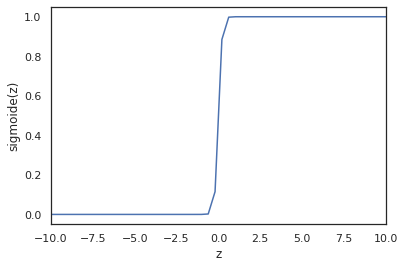

In [10]:
z = np.linspace(-10,10,50)
beta_0 = 0
beta_1 = 10
s = np.exp(beta_0 + beta_1 * z) / (1 + np.exp(beta_0 + beta_1 * z))
# s = 1 / (1 + np.exp(-z))
plt.plot(z, s)
plt.xlabel('z')
plt.ylabel('sigmoide(z)');
plt.xlim([-10,10])

## Churn de una empresa de telecomunicaciones


En esta clase vamos a seguir trabajando con el [dataset de churn de una empresa de telecomunicaciones ficticia](https://www.kaggle.com/blastchar/telco-customer-churn). 

Repasemos en qué consiste el problema. Cada fila representa un cliente, cada columna contiene los atributos del cliente.

El conjunto de datos incluye información sobre

- Clientes que se han dado de baja en el último mes - la columna se llama Churn.
- Servicios que cada cliente ha contratado: teléfono, líneas múltiples, Internet, seguridad en línea, copia de seguridad en línea, protección de dispositivos, soporte técnico y transmisión de TV y películas.
- Información de la cuenta del cliente: cuánto tiempo ha sido cliente, contrato, método de pago, facturación sin papel, cargos mensuales y cargos totales.
- Información demográfica sobre los clientes: sexo, rango de edad y si tienen pareja y personas a su cargo.

Más en detalle, las columnas son las siguientes:

* **customerID** : ID del cliente
* **gender**: Si el cliente es un hombre o una mujer
* **SeniorCitizen** : Si el cliente es una persona mayor o no (1, 0)
* **Partner** : Si el cliente tiene pareja o no (Yes, No)
* **Dependents** : Si el cliente tiene dependientes o no  (Yes, No)
* **tenure** : Número de meses que el cliente ha permanecido en la empresa
* **PhoneService** : Si el cliente tiene servicio telefónico o no (Yes, No)
* **MultipleLines** : Si el cliente tiene varias líneas o no (Yes, No, No phone service)
* **InternetService** : El proveedor de servicios de Internet del cliente (DSL, Fiber optic, No)
* **OnlineSecurity** : Si el cliente tiene seguridad en línea o no (Yes, No, No internet service)
* **OnlineBackup** : Si el cliente tiene copia de seguridad en línea o no (Yes, No, No internet service)
* **DeviceProtection** : Si el cliente tiene protección de dispositivos o no (Yes, No, No internet service)
* **TechSupport** : Si el cliente tiene soporte técnico o no (Yes, No, No internet service)
* **StreamingTV** : Si el cliente tiene o no televisión en streaming (Yes, No, No internet service)
* **StreamingMovies** : Si el cliente tiene películas en streaming o no (Yes, No, No internet service)
* **Contract** : La duración del contrato del cliente (Month-to-month, One year, Two year)
* **PaperlessBilling** : Si el cliente tiene facturación sin papel o no (Yes, No)
* **PaymentMethod** : El método de pago del cliente (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* **MonthlyCharges** : El importe cargado al cliente mensualmente
* **TotalCharges** : El importe total cobrado al cliente
* **Churn** : Si el cliente ha dejado la compañía (Yes or No)

Nuestra variable target es **Churn**.



### 1) Carga de los datos y primera inspección del dataset

Comencemos, como de costumbre, importando el dataset.

In [11]:
dataset = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Veamos la cantidad de filas y de columnas que tiene el dataset:

In [12]:
print('El dataset tiene {} filas y {} columnas'.format(dataset.shape[0],dataset.shape[1]))

El dataset tiene 7043 filas y 21 columnas


### 2) Limpieza y preprocesamiento de datos

Como ya realizamos una análisis exploratorio (EDA) en la clase anterior, en esta clase vamos pasar directamente a la limpieza y preprocesamiento de los datos. 

Nota: hay que señalar que en realidad no es necesario realizar cada vez todo el proceso de preprocesamiento. Podríamos perfectamente salvar los DataFrames limpios en un csv e importar directamente ese archivo. En esta clase vamos a repetir los pasos como repaso.

Recordamos que no tenemos valores nulos y que tenemos que convertir la columna `TotalCharges` a un dtype numérico, porque esta casteado como string. 

In [13]:
dataset['TotalCharges'] = dataset['TotalCharges'].replace(" ", 0).astype('float64')

Eliminamos la columna `customerID`:

In [14]:
dataset.drop('customerID', axis=1, inplace=True)

Creamos las variables dummy:

In [15]:
df_dummies = pd.get_dummies(dataset, drop_first=True)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


Corroboramos cuáles son las features del DataFrame y el tipo de datos:

In [16]:
df_dummies.dtypes

SeniorCitizen                              int64
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                                uint8
Partner_Yes                                uint8
Dependents_Yes                             uint8
PhoneService_Yes                           uint8
MultipleLines_No phone service             uint8
MultipleLines_Yes                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_No internet service         uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_No internet service           uint8
OnlineBackup_Yes                           uint8
DeviceProtection_No internet service       uint8
DeviceProtection_Yes                       uint8
TechSupport_No internet service            uint8
TechSupport_Yes                            uint8
StreamingTV_No inter

Creamos nuestra matriz de *features* y nuestro vector *target*:

In [17]:
y = df_dummies['Churn_Yes']
X = df_dummies.drop(columns = ['Churn_Yes'])

In [18]:
# Verificamos los shapes y los tipos de X e y:
print("Shape X:", X.shape)
print("Type X:", type(X))
print("Shape y:", y.shape)
print("Type y:", type(y))

Shape X: (7043, 30)
Type X: <class 'pandas.core.frame.DataFrame'>
Shape y: (7043,)
Type y: <class 'pandas.core.series.Series'>


Hacemos el split entre train y test sets.

In [19]:
from sklearn.model_selection import train_test_split

rs = 15

X_train, X_test, y_train, y_test = \
                    train_test_split(X, y, stratify=y, test_size=0.25, random_state=rs)

Corroboramos los `shapes` de las matrices:

In [20]:
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (5282, 30)
y_train.shape:  (5282,)
X_test.shape:  (1761, 30)
y_test.shape:  (1761,)


Corroboramos que el set de entrenamiento y de testeo tengan el mimsmo % de observacione por clase. Esto se logra pasando el argumento `stratify=y` en `train_test_split`.

In [21]:
print('y:', y.value_counts(normalize=True).values)

print('y train:', y_train.value_counts(normalize=True).values)

print('y test:', y_test.value_counts(normalize=True).values)

y: [0.73463013 0.26536987]
y train: [0.73457024 0.26542976]
y test: [0.73480977 0.26519023]


##### Estandarización

La implementación de `Sklearn` incorpora por dafault en la función de costo un término de regularización. Por default, se implementa la penalidad *L2*, es decir la misma de la regresión Ridge. Otro punto a tener en cuenta es que en la regresión logística, el hiperparámetro $\alpha$ es reemplazado por el hiperparámetro $C$, que cumple la misma funcionalidad, pero que es el inverso de $\alpha$, es decir que a menor $C$, más regularización y valores de los parámetros más chicos.  


In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, \
                           columns= X_train.columns)

X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, \
                           columns= X_test.columns)

### 3) Clasificación con Regresión Logística

En Scikit-Learn encontramos la implementación de la regresión logística en el módulo de modelos lineales, con en la clase `LogisticRegression`. 

Importemos la clase de la regresión logistica:

In [23]:
from sklearn.linear_model import LogisticRegression

Instanciamos un objeto de la clase `LogisticRegression`:

In [24]:
lor_reg = LogisticRegression()

In [32]:
lor_reg.fit(X_train, y_train)

y_pred_train_proba = lor_reg.predict_proba(X_train)

y_pred_test = lor_reg.predict(X_test)

In [39]:
y_pred_train = y_pred_train_proba[:,1] > 0.5

Calculamos el accuracy, es decir la proporción de predicciones correctamente realizadas, sea para el set de entrenamiento que para el set de testeo:

In [41]:
from sklearn.metrics import accuracy_score

print('Accuracy en el set de entrenamiento = {:.4f}'.format(accuracy_score(y_train, \
                                                                       y_pred_train)))

print('Accuracy en el set de testeo = {:.4f}'.format(accuracy_score(y_test, \
                                                                       y_pred_test)))

Accuracy en el set de entrenamiento = 0.8075
Accuracy en el set de testeo = 0.8024


### 4) Optimización del algoritmo

Instanciamos el clasificador y definimos la grilla de hiperparámetros:

In [42]:
from sklearn.model_selection import GridSearchCV

lor_reg_opt = LogisticRegression(max_iter=10_000)

# Definimos el espacio de búsqueda de hiperparámetros con un diccionario:
param_grid = [{'solver': ['lbfgs', 'liblinear','newton-cg', 'sag'], 
               'penalty': ['l2'], 
               'C':[0.1, 1, 10, 20, 30]},
              {'solver': ['liblinear'], 
               'penalty':[ 'l1'], 
               'C':[0.01, 0.05, 0.075, 0.1, 1, 0.25, 0.75]}]

print(param_grid)

[{'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag'], 'penalty': ['l2'], 'C': [0.1, 1, 10, 20, 30]}, {'solver': ['liblinear'], 'penalty': ['l1'], 'C': [0.01, 0.05, 0.075, 0.1, 1, 0.25, 0.75]}]


Definimos la estrategia de validación cruzada. 

En este caso, en lugar de pasarle directamente a Gridsearch el valor de la cantidad de particiones, le vamos a pasar un objeto de la clase [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) que genera sets de testeo con distribuciones de clase iguales o lo más similares posibles. 

In [44]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=12)

In [45]:
grid = GridSearchCV(lor_reg_opt, param_grid, cv=skf, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=12, shuffle=True),
             estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10, 20, 30], 'penalty': ['l2'],
                          'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag']},
                         {'C': [0.01, 0.05, 0.075, 0.1, 1, 0.25, 0.75],
                          'penalty': ['l1'], 'solver': ['liblinear']}],
             verbose=1)

In [46]:
print(grid.best_estimator_)
print(grid.best_score_)
print(grid.best_params_)

LogisticRegression(C=0.05, max_iter=10000, penalty='l1', solver='liblinear')
0.8057522361744216
{'C': 0.05, 'penalty': 'l1', 'solver': 'liblinear'}


Analicemos los coeficientes del modelo:

In [ ]:
print('coeficientes:', grid.best_estimator_.coef_)
print('intercepto:', grid.best_estimator_.intercept_)

Teniendo en cuenta que se terminó usando la regularización L1, veamos cuántos coeficientes diferentes a 0 quedaron:

In [ ]:
len(grid.best_estimator_.coef_[grid.best_estimator_.coef_ !=0])

Grafiquemos los coeficientes según su magnitud:

In [ ]:
coeficientes = pd.Series(grid.best_estimator_.coef_[0],
                 index=X_train.columns.values)
print(coeficientes.sort_values(ascending = False)[:10].plot(kind='bar'));

In [ ]:
print(coeficientes.sort_values(ascending = False)[-10:].plot(kind='bar'));

Calculemos el accuracy del modelo: 

In [ ]:
y_pred_train = grid.predict(X_train)
print ('Accuracy:', accuracy_score(y_train,y_pred_train).round(4))

y_pred_test = grid.predict(X_test)
print ('Accuracy:', accuracy_score(y_test,y_pred_test).round(4))

¿Cómo podemos analizar más en profundidad la performance del modelo. 

##### Matrices de confusión

Una de las formas más completas de representar el resultado de la evaluación de la clasificación binaria es utilizando matrices de confusión. 

Una matriz de confusión es una matriz de 2x2, donde las filas corresponden a las clases verdaderas y las columnas a las clases predichas.

<img src="img/matrizconfusion.png" width="400">

<div class='epigraph' align="center"><i>    Matriz de Confusión</i></div><br>

Donde:

- **TN** = True Negative: es una clase negativa que ha sido correctamente clasificada como tal. 
- **FP** = False Positive: es una clase negativa que fue erroneamente clasificada como positiva.
- **FN** = False Negative: es una clase positiva que fue erroneamente clasificada como negativa.
- **TP** = True Positive: es una clase positiva que ha sido correctamente clasificada como tal.


In [ ]:
# Elaboramos la matriz de confusión
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred_test), annot=True, fmt='.0f')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

¿Qué nos dice la matriz de confusión sobre la performance?

La clase que viene la vamos a dedicar a estudiar las diferentes métricas de performance de los modelos de clasificación y cuando utilizarlos. 


### ¡Muchas gracias por la atención!